<a href="https://colab.research.google.com/github/emilytsen/suport_vector_machine/blob/main/support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importação das bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import datasets, svm
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Carrega o dataset iris
iris = datasets.load_iris()
x = iris.data # features/atrubitos
y = iris.target # target/classe

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## x = independentes
## y = dependente

In [ ]:
#divide os dados em conjunto de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) #70% train e 30% teste

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html -> parâmetros

In [ ]:
#criar um modelo de suport vector machine
model = svm.SVC(kernel='linear', probability=True, verbose=True)
#linear = mostrar em uma linha
#probability = mostrar probabilidade da flor
#verbose = printar as épocas para visualização

In [ ]:
#treinar modelo
model.fit(x_train, y_train) # dependente, independente

[LibSVM]

SVC(kernel='linear', probability=True, verbose=True)

In [ ]:
#fazer as previsões com o conjunto de teste
y_pred = model.predict(x_test) #previsões

#relatório das métricas do modelo
report = classification_report(y_test, y_pred)
print('Relatório de métricas do modelo:')
print(report)

# 0 = setosa
# 1 = virginica
# 2 = versicolor

Relatório de métricas do modelo:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.87      0.93        15
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
# relatorio das metricas do modelo por uma matriz de confusão
matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusão:')
print(matrix)

#  0  1  2
#0
#1
#2

Matriz de confusão:
[[18  0  0]
 [ 0 13  2]
 [ 0  0 12]]


#repetindo o processo para fazer um gráfico

In [ ]:
# grafico dos hiperplanos separadores
x = iris.data[:, :2]
y = iris.target

model = svm.SVC(kernel='linear', probability=True, verbose=True)
model.fit(x, y)



[LibSVM]

SVC(kernel='linear', probability=True, verbose=True)

In [ ]:
#criar ambiente para os gráficos
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1 # eixo x terá o valor min e maximo do df
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

h = (x_max / x_min)/100 # passo entre um valor e outro do gráfico

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#são usadas para criar uma grade de pontos em todo o espaço de entrada, que é utilizada para visualizar a fronteira de decisão do modelo

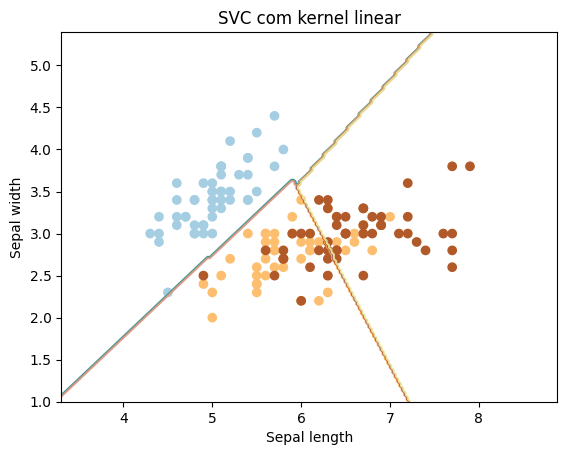

In [ ]:
# Criando o gráfico
plt.subplot(1,1,1)  # Cria um subplot com 1 linha e 1 coluna, selecionando a primeira (e única) posição.
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # Faz a previsão usando o modelo para cada ponto da grade gerada por xx e yy.
Z = Z.reshape(xx.shape)  # Reorganiza o vetor Z para ter a mesma forma da grade xx, para que possa ser usado na plotagem.
plt.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)  # Cria um gráfico de contorno preenchido (contour plot) baseado nas previsões, colorindo as regiões.
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired)  # Plota os pontos de dados originais x com as cores determinadas pelos seus rótulos y.
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())  # Define os limites do eixo x com base nos valores mínimos e máximos de xx.
plt.title('SVC com kernel linear')
plt.show()
